In [2]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df =pd.read_csv('https://gist.githubusercontent.com/KhanradCoder/35a6beea49e5b9ba62797e595a9626c0/raw/8974e055bdf3a9d7e6cacf1c1c30fcfd2ffd6de3/cancer.csv')
df.head()

,"diagnosis(1=m, 0=b)",radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X = df.iloc[:, 1:30].values 
Y = df.iloc[:, 0].values

In [5]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test) 

In [7]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [8]:
Y_pred = classifier.predict(X_test) 

In [9]:
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix 

array([[70,  1],
       [ 1, 42]], dtype=int64)

In [10]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.9824561403508771
Precision: 0.9767441860465116
Recall: 0.9767441860465116


Text(0.5, 257.44, 'Predicted label')

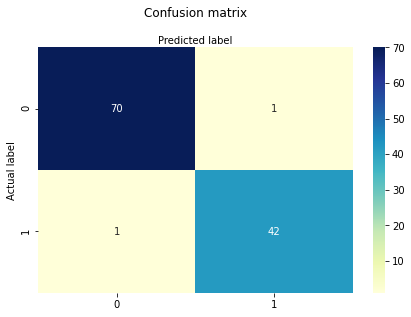

In [11]:
import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [12]:
# 5 folds selected
kfold = KFold (n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression (solver='liblinear')
results = cross_val_score (model, X, Y, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds. 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 95.434% (2.737%)


In [13]:
kfold = KFold (n_splits=10, random_state=0, shuffle=True)
model = LogisticRegression (solver='liblinear')
results = cross_val_score (model, X, Y, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds. 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 95.432% (3.858%)


In [14]:
# Construct a confusion matrix
from sklearn.model_selection import train_test_split
test_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)
model = LogisticRegression (solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix (Y_test, predicted) 
print(matrix)

[[63  4]
 [ 1 46]]


In [18]:
C= [10, 1, .1, .001]

for c in C:
    clf=LogisticRegression (penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, Y_train)
    print('C:', c)
    print('Training accuracy:', clf.score (X_train, Y_train)) 
    print('Test accuracy:', clf.score (X_test, Y_test)) 
    print(" ")

C: 10
Training accuracy: 0.9758241758241758
Test accuracy: 0.9649122807017544
 
C: 1
Training accuracy: 0.9626373626373627
Test accuracy: 0.956140350877193
 
C: 0.1
Training accuracy: 0.9406593406593406
Test accuracy: 0.9385964912280702
 
C: 0.001
Training accuracy: 0.9164835164835164
Test accuracy: 0.9122807017543859
 


C:\Users\Bharath Kumar\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [19]:
C= [10, 1, .1, .001]

for c in C:
    kfold = KFold (n_splits=5, random_state=0, shuffle=True)
    clf=LogisticRegression (penalty='l1', C=c, solver='liblinear')
    results = cross_val_score (clf, X, Y, cv=kfold)
    print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy: 96.313% (1.951%)


C:\Users\Bharath Kumar\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Bharath Kumar\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Bharath Kumar\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Bharath Kumar\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy: 95.609% (2.658%)


C:\Users\Bharath Kumar\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Bharath Kumar\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy: 92.972% (3.232%)
Accuracy: 91.388% (2.797%)
